In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from time import sleep
from bs4 import BeautifulSoup
import re
import sys
import requests
import json
import datetime
import pandas as pd
import pickle
import gc
import sys
sys.path.append("C:/Users/USER/Desktop/Investment/Strategy_Daily/2409/sentiment")
import pickle
import warnings
warnings.filterwarnings("ignore")
from collections import OrderedDict
from sqlalchemy import create_engine, VARCHAR
import sqlalchemy
host = 'localhost'
port = "3306"
user = 'root'
pwd = 'test123'
name = 'stock_daily'
conn = create_engine('mysql+pymysql://'+user+':'+pwd+'@'+host+':'+port+'/'+name)

### Time
- 2022/01/01 - Now
### Data columns
- Time, title, content, url
### Progress
- Problem: something went wrong when scraping news time. Error url: https://money.udn.com/money/story/5612/7347687?from=edn_search_result\
Error message:
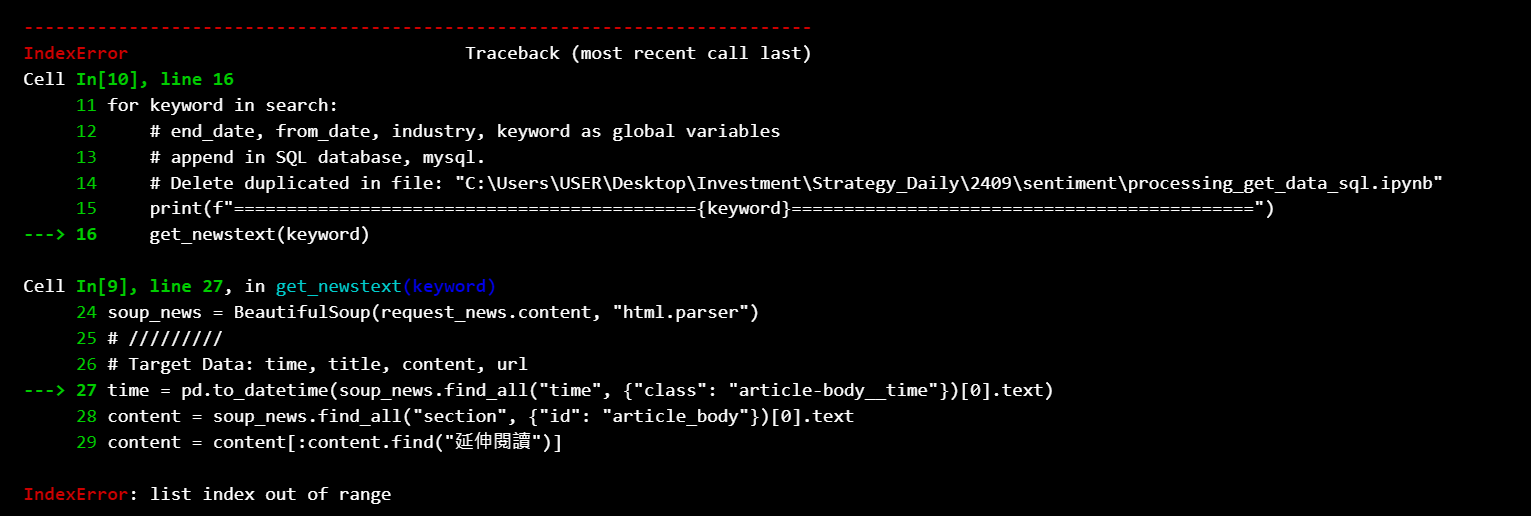

### Functions

In [2]:
def store_db(data, table_name, con):
    # Always append
    try: 
        data.to_sql(table_name, con=con, if_exists='append')
    except:
        print("!!! Notice: bad data. The bad data below !!!")
        print(data)
        data.to_sql(table_name, con=con, if_exists='append')
                
def store_base(data, table_name):
    with open(f"{table_name}.pickle", "wb") as f:
        pickle.dump(data, f)

def load_db(table_name, con):
    pass

def load_base(table_name):
    with open(f"{table_name}.pickle", "rb") as f:
        data = pickle.load(f)
    return data




### Get news links

In [3]:
from_date = pd.to_datetime("2022/01/01")
end_date = pd.to_datetime(datetime.datetime.now()) # pd.to_datetime("2022/12/31")

def get_newstext(keyword): 
    # GET THE NEWS DATA WITH DATAFRAME AND COLUMNS: [TIME, TITLE, CONTENT, URL]
    page = 1       
    while True:
        print("start scraping page:", page, f"https://money.udn.com/search/result/1001/{keyword}/{page}")
        gc.collect()
        table_name = f"news_text_udn_{keyword}"
        request = requests.get(f"https://money.udn.com/search/result/1001/{keyword}/{page}")
        soup = BeautifulSoup(request.content, "html.parser")
        soup.find_all("div", {"class": "story__content"})[0]
        url_page = [i["href"] for i in soup.find_all("a", {"data-slotname": "list_搜尋結果頁"})]
        time = [pd.to_datetime(i.text) for i in set(soup.find_all("time")) - set(soup.find_all("time", {"class": "rank__time"}))]
        page += 1
        if min(time) >= end_date:
            continue
        print(".........successfully scrape page")
        for url_news in list(OrderedDict.fromkeys(url_page).keys()):              
            print("start scraping news:", url_news) 
            request_news = requests.get(url_news)
            soup_news = BeautifulSoup(request_news.content, "html.parser")
            # ///////// 
            # Target Data: time, title, content, url
            # Something went wrong
            time = pd.to_datetime(soup_news.find_all("time", {"class": "article-body__time"})[0].text)
            content = soup_news.find_all("section", {"id": "article_body"})[0].text
            content = content[:content.find("延伸閱讀")]
            title = soup_news.find_all("h1", {"class": "article-head__title"})[0].text
            news_texts = pd.DataFrame({"time": [time], "title": [title], "content": [content], "url_news": [url_news]})
            print(".........successfully scrape news: ", time, title)
            # /////////
            # Check if in target time
            if time < from_date:
                break
            if time > end_date:
                continue
            # /////////
            # store 
            store_db(news_texts, table_name, conn)
            sleep(3)
            print(".........successfully store scrape news")
            
        

In [11]:
# /////////////////////////////////////////////////
# Scraped time interval: 2022/07/28 ~ 2023/08/10. Don't scraped this interval later. 
# from 2022/07/01 to now: 創意3443、友達
search = ["面板"] #  keywords, "友達", "面板",  "顯示器", "AI"
from_date = pd.to_datetime("2022/07/01")
end_date = pd.to_datetime("2022-10-27 16:49:47") # pd.to_datetime(datetime.datetime.now()) 

# /////////////////////////////////////////////////
# Todos: 
# 1. Scraped keyword 面板 and 顯示器
# 2. Get Data from SQL (with another code file)
# 3. Finetuning in colab
for keyword in search:
    # end_date, from_date, industry, keyword as global variables
    # append in SQL database, mysql. 
    # Delete duplicated in file: "C:\Users\USER\Desktop\Investment\Strategy_Daily\2409\sentiment\processing_get_data_sql.ipynb"
    print(f"============================================{keyword}============================================")
    get_newstext(keyword) 

============================================面板============================================
start scraping page: 1 https://money.udn.com/search/result/1001/面板/1
start scraping page: 2 https://money.udn.com/search/result/1001/面板/2
start scraping page: 3 https://money.udn.com/search/result/1001/面板/3
start scraping page: 4 https://money.udn.com/search/result/1001/面板/4
start scraping page: 5 https://money.udn.com/search/result/1001/面板/5
start scraping page: 6 https://money.udn.com/search/result/1001/面板/6
start scraping page: 7 https://money.udn.com/search/result/1001/面板/7
start scraping page: 8 https://money.udn.com/search/result/1001/面板/8
start scraping page: 9 https://money.udn.com/search/result/1001/面板/9
start scraping page: 10 https://money.udn.com/search/result/1001/面板/10
start scraping page: 11 https://money.udn.com/search/result/1001/面板/11
start scraping page: 12 https://money.udn.com/search/result/1001/面板/12
start scraping page: 13 https://money.udn.com/search/result/1001/面板/13
star

IndexError: list index out of range

### Debug 

In [ ]:
url_news = "https://money.udn.com/money/story/5612/7347687?from=edn_search_result"
request_news = requests.get(url_news)
soup_news = BeautifulSoup(request_news.content, "html.parser")

time = pd.to_datetime(soup_news.find_all("time", {"class": "article-body__time"})[0].text)
content = soup_news.find_all("section", {"id": "article_body"})[0].text
content = content[:content.find("延伸閱讀")]
title = soup_news.find_all("h1", {"class": "article-head__title"})[0].text
news_texts = pd.DataFrame({"time": [time], "title": [title], "content": [content], "url_news": [url_news]})

# Others

In [ ]:
def store(data, table, con):
    if con == None: # if not in database
        with open(f"{table}.pickle", "wb") as f:
            pickle.dump(data, f)
    else:
        try: # if in database
            data = pd.DataFrame(data).transpose().reset_index().rename(columns={"index": "date", 0: "title", 1:"text", 2:"link"})
            data.reset_index().to_sql(table, con=con, if_exists='append')
        except:
            print("bad data")
            print(data)
            pass
       

# check news links: 
# keyword = "友達"
# links = store_load(data = None, table = f"links_udn{keyword}", con = None, operate = "load")
def article(url_page, news_timetext, date_title, date_content, end_date, from_date, time_old):
    print("---------------------------------------------------")
    a_page = requests.get(url_page)
    soup_page = BeautifulSoup(a_page.content, "html.parser")
    content = soup_page.find_all("section", {"id": "article_body"})[0].text
    content = content[:content.find("延伸閱讀")]
    title = soup_page.find_all("h1", {"class": "article-head__title"})[0].text
    time = pd.to_datetime(soup_page.find_all("time", {"class": "article-body__time"})[0].text)
    print(time)

    if time <= end_date and time >= from_date:
        if time.date() == time_old:
            print(url_page)
            date_title = date_title + "\r" + title
            date_content = date_content + "\r" + content
            news_timetext.update({time.date(): [date_title, date_content, url_page]})
        else:
            if news_timetext != {}:
                # store(news_timetext, f"sentiment_textudn{industry}{keyword}", conn)
                print(time)
            print(time)
            time_old = time.date()
            news_timetext = {}
            date_title = ""
            date_content = ""
            date_title = date_title + "\r" + title
            date_content = date_content + "\r" + content
            news_timetext.update({time.date(): [date_title, date_content, url_page]})
        print(news_timetext)
    return news_timetext, time.date(), date_title, date_content, time_old

def get_urlpages_mintime(page):
    try: 
        a = requests.get(f"https://money.udn.com/search/result/1001/{keyword}/{page}")
        soup = BeautifulSoup(a.content, "html.parser")
        soup.find_all("div", {"class": "story__content"})[0]
        url_pages = [i["href"] for i in soup.find_all("a", {"data-slotname": "list_搜尋結果頁"})]
        time = [pd.to_datetime(i.text) for i in \
                set(soup.find_all("time")) - set(soup.find_all("time", {"class": "rank__time"}))]
        mintimeforthepage = min(time)
        maxtimeforthepage = max(time)
        page += 1
    except:
        pass
    return url_pages, mintimeforthepage, maxtimeforthepage

def udn(end_date, from_date):
    # url_pages: mutiple news in one page
    # url_page: 1 news in the page
    page = 1
    time_old = pd.to_datetime("2010/01/05")
    date_title = ""
    date_content = ""
    news_timetext = {}
    while True:
        gc.collect()
        # new page ////////////////////////////
        url_pages, mintimeforthepage, maxtimeforthepage = get_urlpages_mintime(page)
        page += 1
        print("minmaxtime:", mintimeforthepage, maxtimeforthepage)
        if mintimeforthepage >= end_date:
            continue
        if maxtimeforthepage <= from_date:
            break

        # news in page ////////////////////////////
        for url_page in url_pages:#[0]["href"]:"a", {"data-content_level": "開放閱讀"}
            news_timetext, time, date_title, date_content, time_old = \
                article(url_page, news_timetext, date_title, date_content, end_date, from_date, industry, keyword, time_old)
            print(news_timetext)
            if time <= from_date:
                break        
        if time <= from_date:
            break
    partial_news_timetext = news_timetext
    return partial_news_timetext

industry = "optoe"
search = ["友達", "面板",  "顯示器"] #  keywords
news_timetext = {}
from_date = pd.to_datetime("2020/01/01")
end_date = pd.to_datetime("2022/12/31")
for keyword in search:
    print(f"============================================{keyword}============================================")
    partial_news_timetext = udn(end_date, from_date) # industry, keyword


In [95]:

from bs4 import BeautifulSoup
search = "面板"       

# //////////////////////////////////////////////////////////////////////////
# first page
old = ''
news_timetext = {}
url = f"https://money.udn.com/search/result/1001/{search}"
a = requests.get(url)
soup = BeautifulSoup(a.content, "html.parser")
soup.find_all("div", {"class": "story__content"})[0]
url_pages = [i["href"] for i in soup.find_all("a", {"data-slotname": "list_搜尋結果頁"})]
# news in page
for url_page in url_pages:#[0]["href"]:"a", {"data-content_level": "開放閱讀"}
    if url_page == old:
        continue
    print("---------------------------------------------------")
    a_page = requests.get(url_page)
    soup_page = BeautifulSoup(a_page.content, "html.parser")
    content = soup_page.find_all("section", {"id": "article_body"})[0].text
    content = content[:content.find("延伸閱讀")].replace("\n", "").replace("\r", "")
    title = soup_page.find_all("h1", {"class": "article-head__title"})[0].text
    time = pd.to_datetime(soup_page.find_all("time", {"class": "article-body__time"})[0].text)
    print(url_page)
    print(time)
    print(title)
    if title in news_timetext:
        print("duplicate")
        continue
    if time <= pd.to_datetime("2023/01/01"):
        break
    news_timetext.update({title: [time, content]})
    with open("result_udntimetext.pickle", "wb") as f:
        pickle.dump(news_timetext, f)
    old = url_page

# //////////////////////////////////////////////////////////////////////////
# page from 2 to n 
page = 2
while True:
    """if min(times) <= pd.to_datetime("2023/01/01"):
        break"""
    # new page ////////////////////////////
    try:
        a = requests.get(f"https://money.udn.com/search/result/1001/{search}/{page}")
        soup = BeautifulSoup(a.content, "html.parser")
        soup.find_all("div", {"class": "story__content"})[0]
        url_pages = [i["href"] for i in soup.find_all("a", {"data-slotname": "list_搜尋結果頁"})]
        page += 1
    except:
        break

    
    # news in page ////////////////////////////
    for url_page in url_pages:#[0]["href"]:"a", {"data-content_level": "開放閱讀"}
        if url_page == old:
            continue
        print(f"page {page-1}---------------------------------------------------")
        a_page = requests.get(url_page)
        soup_page = BeautifulSoup(a_page.content, "html.parser")
        content = soup_page.find_all("section", {"id": "article_body"})[0].text
        content = content[:content.find("延伸閱讀")].replace("\n", "").replace("\r", "")
        title = soup_page.find_all("h1", {"class": "article-head__title"})[0].text
        time = pd.to_datetime(soup_page.find_all("time", {"class": "article-body__time"})[0].text)
        print(url_page)
        print(time)
        print(title)
        if title in news_timetext:
            print("duplicate")
            continue
        if time <= pd.to_datetime("2023/01/01"):
            break
        news_timetext.update({title: [time, content]})      
        with open("result_udntimetext.pickle", "wb") as f:
            pickle.dump(news_timetext, f)
        old = url_page


    

---------------------------------------------------
https://money.udn.com/money/story/5735/7290517?from=edn_search_result
2023-07-10 16:05:37
ESG來襲 科磊推節能顯示器量產製程控制解決方案
---------------------------------------------------
https://money.udn.com/money/story/5612/7290433?from=edn_search_result
2023-07-10 15:34:28
朋億6月、第2季、上半年營收齊創同期新高
---------------------------------------------------
https://money.udn.com/money/story/5612/7290396?from=edn_search_result
2023-07-10 15:21:21
面板價格上漲 友達第2季營收季增23.7%
---------------------------------------------------
https://money.udn.com/money/story/5612/7290336?from=edn_search_result
2023-07-10 15:05:37
群創全台最大300吋 P1.27 AM miniLED 影音牆 喜樂時代影城亮相
---------------------------------------------------
https://money.udn.com/money/story/5612/7290201?from=edn_search_result
2023-07-10 14:20:22
友達6月營收229.51億元、月增5.3% 寫近15個月新高
---------------------------------------------------
https://money.udn.com/money/story/5607/7289638?from=edn_search_result
2023-07-10 08:07:11
7月10日盤前／

KeyboardInterrupt: 

In [92]:
a.keys()

dict_keys([Timestamp('2023-07-10 16:05:37'), Timestamp('2023-07-10 15:34:28'), Timestamp('2023-07-10 15:21:21'), Timestamp('2023-07-10 15:05:37'), Timestamp('2023-07-10 14:20:22'), Timestamp('2023-07-10 08:07:11'), Timestamp('2023-07-10 03:22:36'), Timestamp('2023-07-10 02:41:58')])

In [94]:
if pd.to_datetime("2023-07-10 16:05:37") in a:
    print("yes")

yes
